# Разведочный анализ данных. Исследование и визуализация данных.


## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных по ценам на дома в Бостоне - https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Данные о ценах на жилье в Бостоне использовались во многих работах по машинному обучению, посвященных проблемам регрессии.

Файл содержит следующие колонки:
- CRIM - уровень преступности по городу
- ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв. футов.
- INDUS - доля акров не-розничного бизнеса на один город
- CHAS Charles River - фиктивная переменная (= 1, если тракт ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в одном жилом помещении
- AGE - доля занятых владельцами квартир, построенных до 1940 года
- DIS - звешенные расстояния до пяти Бостонских центров занятости
- RAD - индекс доступности радиальных магистралей
- TAX - недвижимость с полной стоимостью-ставка налога на 10 000 долларов США
- PTRATIO -  соотношение учеников и учителей по городам
- B 1000(Bk - 0.63)^2 -  где Bk-доля чернокожих по городам
- LSTAT % - более низкий статус населения
- MEDV - медианная стоимость домов, занятых владельцами, в 2000-х годах

## Импорт библиотек
Импортируем библиотеки с помощью команды import. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import *
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных
Загрузим файлы датасета с помощью библиотеки Pandas.

In [7]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

## 2) Основные характеристики датасета

In [8]:
temp_df = make_dataframe(load_boston)
temp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
temp_df.shape

(506, 14)

In [13]:
total_count = temp_df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 506


In [14]:
temp_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [15]:
temp_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [16]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in temp_df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = temp_df[temp_df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
target - 0


In [17]:
# Основные статистические характеристки набора данных
temp_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
# Определим уникальные значения для целевого признака
temp_df['CHAS'].unique()

array([0., 1.])

Целевой признак является бинарным и содержит только значения 0 и 1.

## 3) Визуальное исследование датасета
### *Гистограмма*
Позволяет оценить плотность вероятности распределения данных.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

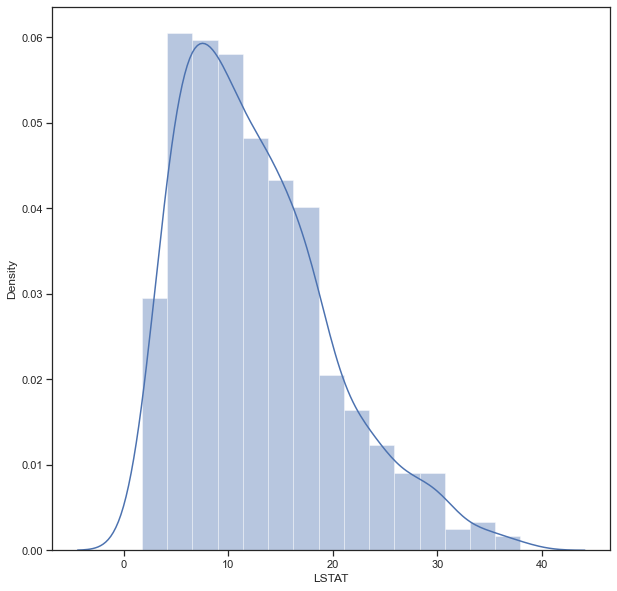

In [25]:
ig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(temp_df['LSTAT'])

### *Диаграмма рассеяния*
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='CRIM', ylabel='LSTAT'>

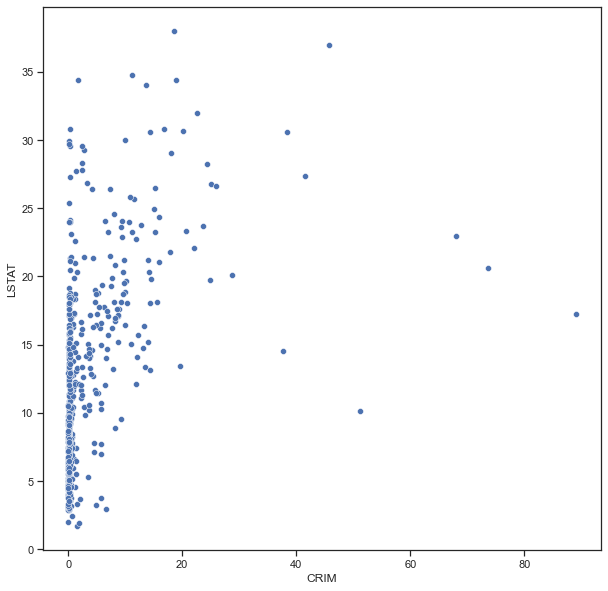

In [29]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CRIM', y='LSTAT', data=temp_df)

### *Jointplot*
Комбинация гистограмм и диаграмм рассеивания.

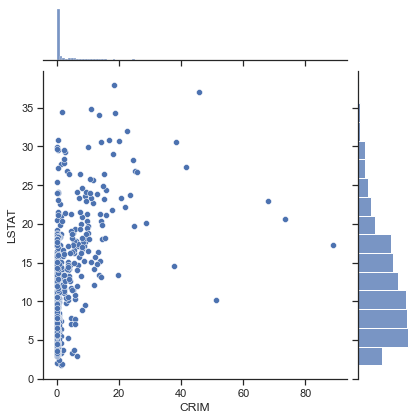

In [30]:
sns.jointplot(x='CRIM', y='LSTAT', data=temp_df)

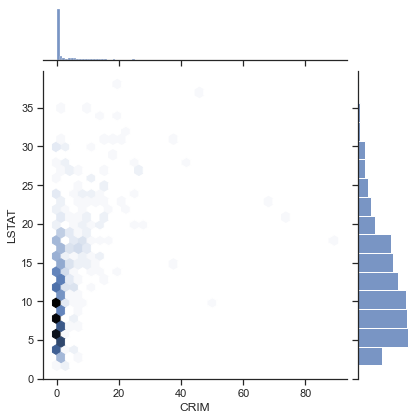

In [31]:
sns.jointplot(x='CRIM', y='LSTAT', data=temp_df, kind="hex")

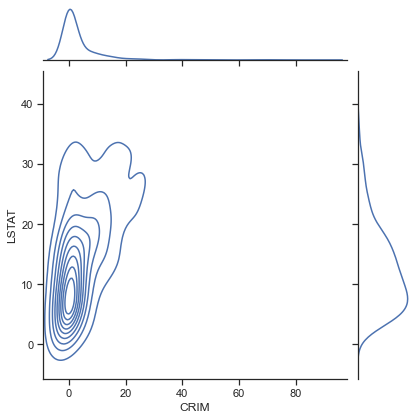

In [32]:
sns.jointplot(x='CRIM', y='LSTAT', data=temp_df, kind="kde")

### *Парные диаграммы*
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

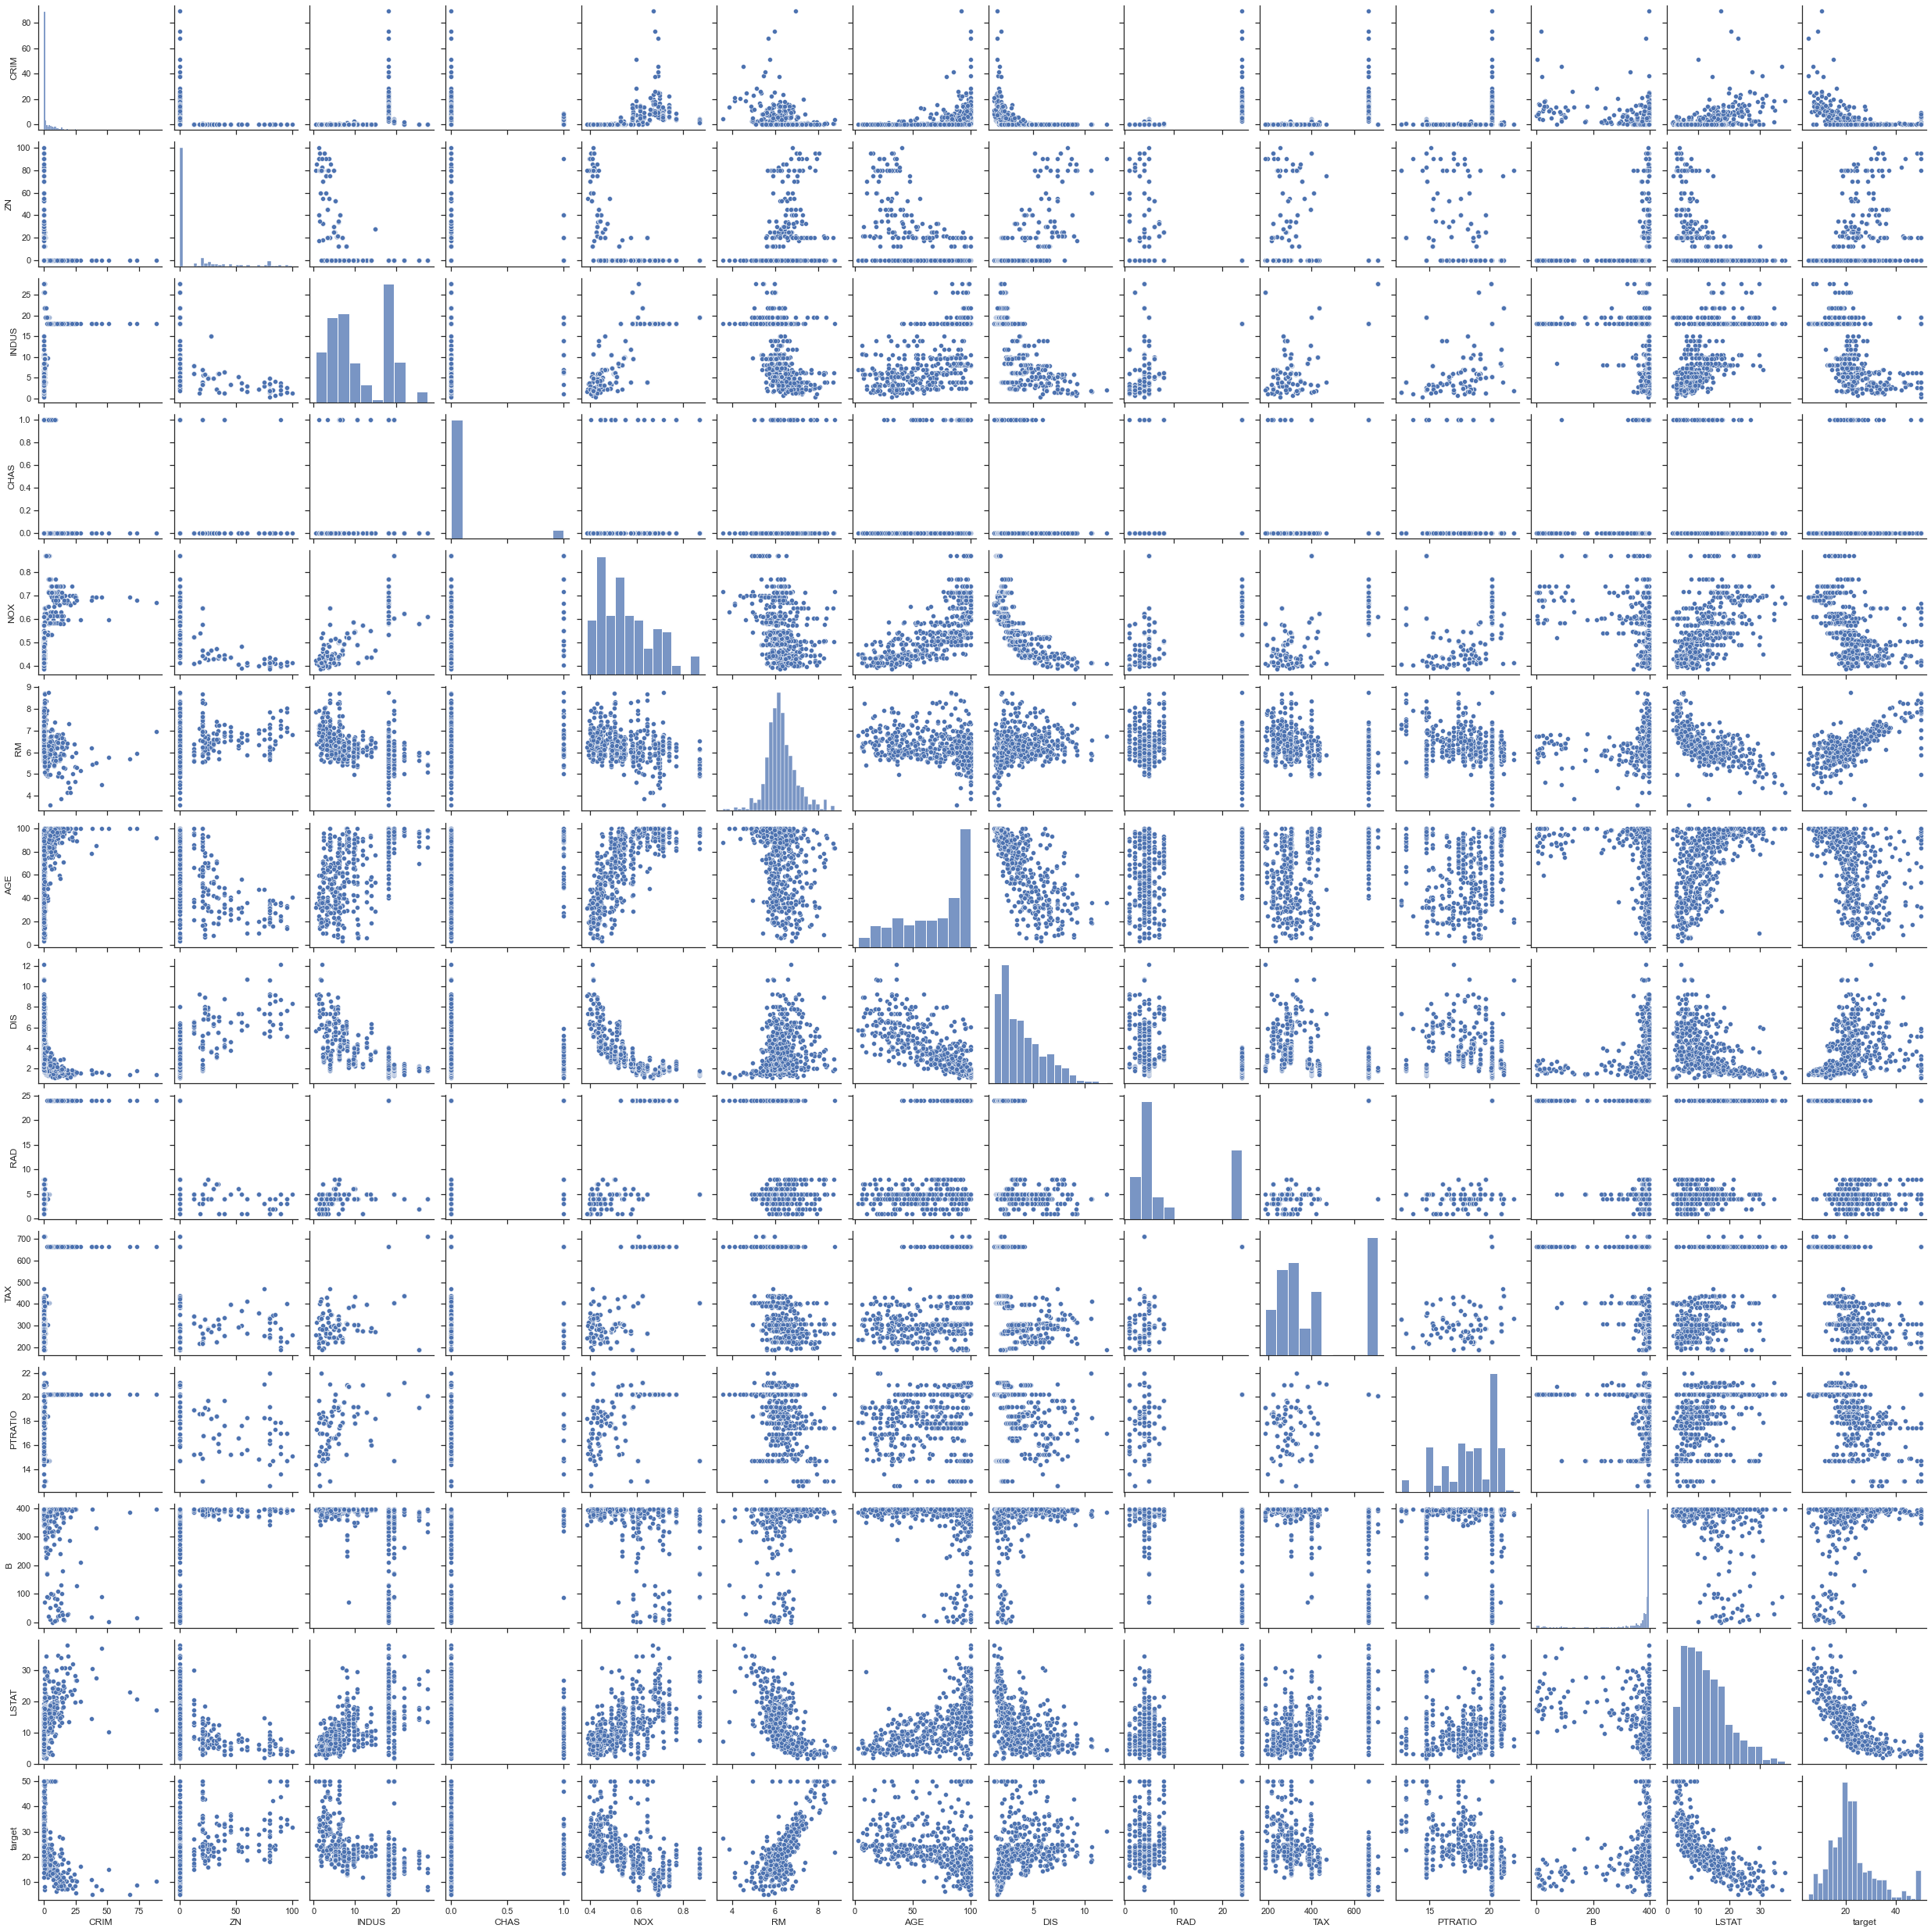

In [38]:
sns.pairplot(temp_df)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

### *Ящик с усами*
Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='AGE'>

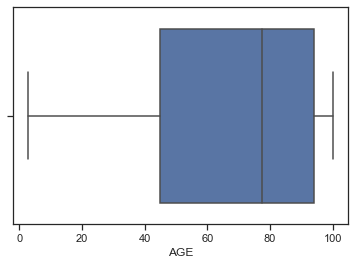

In [45]:
sns.boxplot(x=temp_df['AGE'])

<AxesSubplot:ylabel='AGE'>

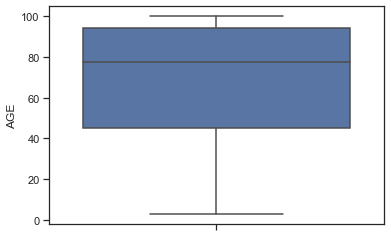

In [46]:
sns.boxplot(y=temp_df['AGE'])

<AxesSubplot:xlabel='CHAS', ylabel='AGE'>

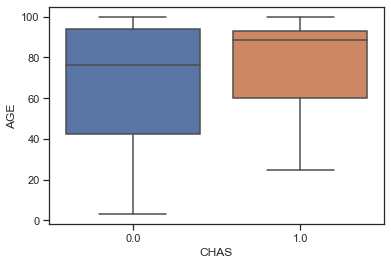

In [55]:
# Распределение параметра AGE сгруппированные по RM.
sns.boxplot(x='CHAS', y='AGE', data=temp_df)

### *Violin plot*
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности.

<AxesSubplot:xlabel='AGE'>

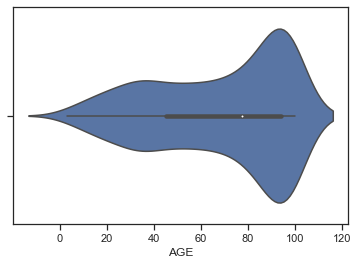

In [50]:
sns.violinplot(x=temp_df['AGE'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

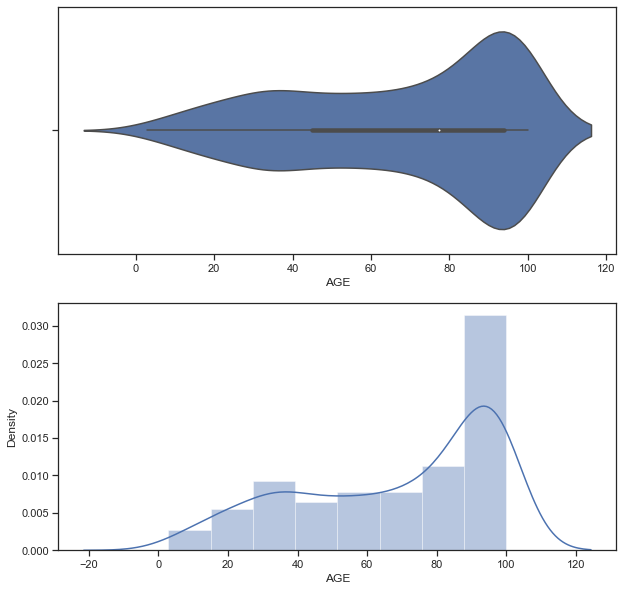

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=temp_df['AGE'])
sns.distplot(temp_df['AGE'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<AxesSubplot:xlabel='CHAS', ylabel='AGE'>

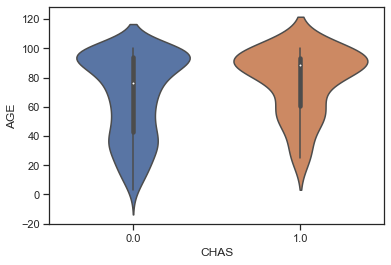

In [54]:
sns.violinplot(x='CHAS', y='AGE', data=temp_df)

## 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "CHAS"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [56]:
temp_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак наиболее сильно коррелирует с таргетом(0.18). Этот признак обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с концентрацией оксидов азота (0.09), средним количеством комнат (0.09) и долей занятых владельцами квартир (0.09). Эти признаки стоит также оставить в модели.
- Целевой признак слабо коррелирует с остальными. Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- TAX и RAD очень сильно коррелируют между собой (0.91). Поэтому из этих признаков в модели можно оставлять только один.
- Также можно сделать вывод, что выбирая из признаков RAD и TAX лучше выбрать RAD, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [58]:
temp_df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [59]:
temp_df.corr(method='kendall')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.462057,0.521014,0.033948,0.603361,-0.211718,0.497297,-0.539878,0.563969,0.544956,0.312768,-0.264378,0.454837,-0.403964
ZN,-0.462057,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818,0.339989
INDUS,0.521014,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980,-0.418430
CHAS,0.033948,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344,0.115202
NOX,0.603361,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005,-0.394995
RM,-0.211718,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231,0.482829
AGE,0.497297,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359,-0.387758
DIS,-0.539878,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347,0.313115
RAD,0.563969,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943,-0.248115
TAX,0.544956,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191,-0.414650


In [60]:
temp_df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn

<AxesSubplot:>

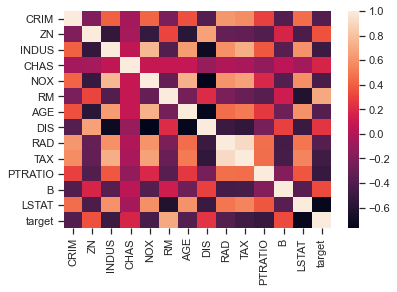

In [61]:
sns.heatmap(temp_df.corr())

<AxesSubplot:>

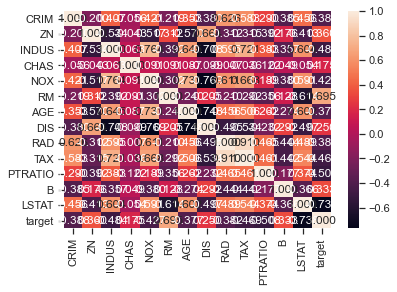

In [62]:
# Вывод значений в ячейках
sns.heatmap(temp_df.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

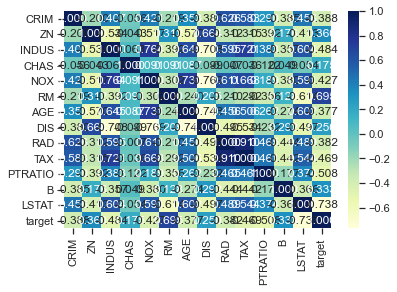

In [63]:
# Изменение цветовой гаммы
sns.heatmap(temp_df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

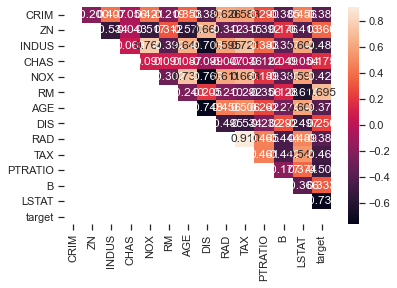

In [64]:
# Треугольный вариант матрицы
mask = np.zeros_like(temp_df.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(temp_df.corr(), mask=mask, annot=True, fmt='.3f')

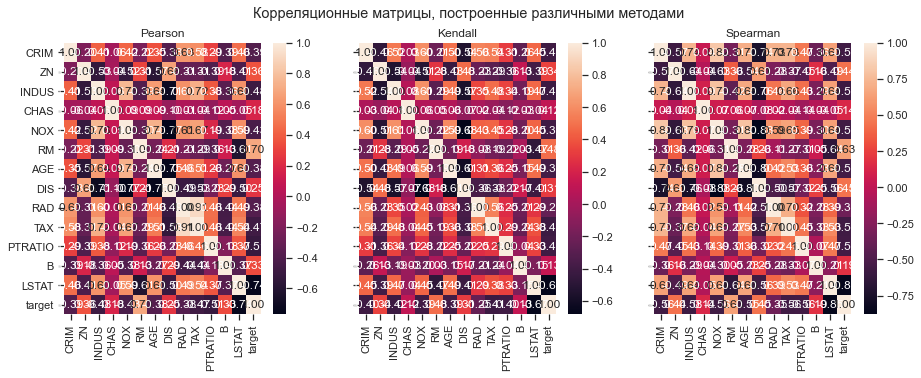

In [65]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(temp_df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(temp_df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(temp_df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')